# Diffusion Theory 

In [4]:
# Our numerical workhorses
import numpy as np
import pandas as pd

# Import matplotlib stuff for plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Seaborn, useful for graphics
import seaborn as sns

# favorite Seaborn settings for notebooks
rc={'lines.linewidth': 2, 
    'axes.facecolor' : 'F4F3F6',
    'axes.edgecolor' : '000000',
    'axes.linewidth' : 1.2,
    'grid.color' : 'a6a6a6',
    'lines.linewidth': 2,
    'axes.labelsize': 18,
    'axes.titlesize': 20,
    'xtick.major' : 13,
    'xtick.labelsize': 'large',
    'ytick.labelsize': 13,
    'font.family': 'Lucida Sans Unicode',
    'grid.linestyle': ':',
    'grid.linewidth': 1.5,
    'mathtext.fontset': 'stixsans',
    'mathtext.sf': 'sans',
    'legend.frameon': True,
    'legend.fontsize': 13}

plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
plt.rc('mathtext', fontset='stixsans', sf='sans')
sns.set_style('darkgrid', rc=rc)
sns.set_palette("colorblind", color_codes=True)
sns.set_context('notebook', rc=rc)

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline (only use with static plots (non-Bokeh))
%config InlineBackend.figure_format = 'svg'

## Mutation and Selection.

The steady state distribution for mutation and selection is of the form
$$
P(f) \propto \left[ f(1-f) \right]^{2N\mu - 1},
\tag{1}
$$
where $f$ is the allele frequency $\mu$ is the mutation rate, and $N$ is the population size (effective population size can be).

Let's plot this for different values of $\mu$

In [42]:
def mut_drift(f, N_mu):
    prob = (f * (1 - f))**(2 * N_mu - 1)
    idx = np.logical_and(prob >=0, prob!=np.inf) # to avoid indeterminations
    return f[idx], prob[idx]

/Users/razo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in power
  from ipykernel import kernelapp as app


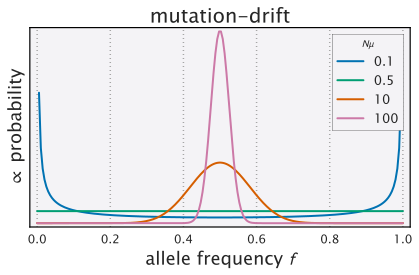

In [46]:
# Define parameters
N_mu = [0.1, 1 / 2, 10, 100]
freq = np.linspace(0, 1, 200)

fig, ax = plt.subplots(1, 1)
# Loop through mutation rates and plot the distribution
for nm in N_mu:
    f, prob = mut_drift(freq, nm)
    plt.plot(f, prob / np.sum(prob),
             label=str(nm))
ax.legend(title='$N \mu$')
ax.set_xlabel('allele frequency $f$')
ax.set_ylabel('$\propto$ probability')
ax.set_title('mutation-drift')
ax.axes.get_yaxis().set_ticks([])
ax.margins(0.02)
plt.tight_layout()
plt.savefig('fig/mutation_drift.png')

## Selection and Drift

#### Haploid organisms

The steady state distribution of allele frequency for an allele $A$ with fitness $\omega_A = 1$ that is in a population with another allele $a$ with fitness $\omega_a = 1 - s$ is of the form
$$
P(f) \propto \frac{e^{-2Ns(1-f)}}{f(1-f)}
\tag{2}
$$
Let's plot it for different values of $s$.

In [59]:
def sel_drift_hap(f, N_s):
    prob = np.exp(-2 * N_s * (1 - f)) / (f * (1 - f))
    idx = np.logical_and(prob >=0, prob!=np.inf) # to avoid indeterminations
    return f[idx], prob[idx]

/Users/razo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


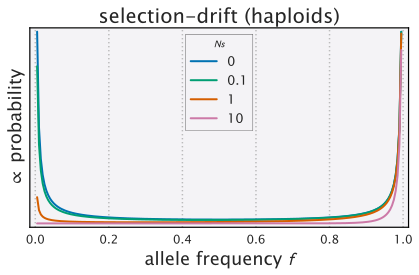

In [70]:
# Define parameters
N_s = [0, 0.1, 1, 10]
freq = np.linspace(0, 1, 200)

fig, ax = plt.subplots(1, 1)
# Loop through mutation rates and plot the distribution
for ns in N_s:
    f, prob = sel_drift_hap(freq, ns)
    plt.plot(f, prob, #/ np.sum(prob),
             label=str(ns))
ax.legend(loc='upper center', title='$N s$')
ax.set_xlabel('allele frequency $f$')
ax.set_ylabel('$\propto$ probability')
ax.set_title('selection-drift (haploids)')
ax.axes.get_yaxis().set_ticks([])
ax.margins(0.02)
plt.tight_layout()
plt.savefig('fig/sel_drift_haploid.png')

### Diploid organisms

#### Heterozygote advantage.
For the case of a diploid organism where the genotypes have fitness values
\begin{align}
\omega_{AA} = 1,\\
\omega_{Aa} = 1 + s,\\
\omega_{aa} = 1,
\end{align}
we have that the steady state distribution of alleles is of the form
$$
P(f) \propto \frac{e^{4Ns f(1 - f)}}{f(1 - f)}
\tag{3}
$$
Let's look at some distributions.

In [63]:
def sel_drift_dip_hetero_advantage(f, N_s):
    prob = np.exp(4 * N_s * f * (1 - f)) / (f * (1 - f))
    idx = np.logical_and(prob >=0, prob!=np.inf) # to avoid indeterminations
    return f[idx], prob[idx]

/Users/razo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


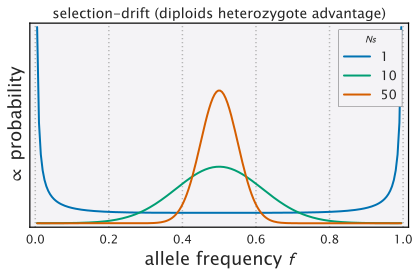

In [74]:
# Define parameters
N_s = [1, 10, 50]
freq = np.linspace(0, 1, 200)

fig, ax = plt.subplots(1, 1)
# Loop through mutation rates and plot the distribution
for ns in N_s:
    f, prob = sel_drift_dip_hetero_advantage(freq, ns)
    plt.plot(f, prob / np.sum(prob),
             label=str(ns))
ax.legend(loc=0, title='$N s$')
ax.set_xlabel('allele frequency $f$')
ax.set_ylabel('$\propto$ probability')
ax.set_title('selection-drift (diploids heterozygote advantage)', fontsize=14)
ax.axes.get_yaxis().set_ticks([])
ax.margins(0.02)
plt.tight_layout()
plt.savefig('fig/sel_drift_diploid_hetero_advantage.png')

#### Heterozygote Intermediate.
For the case of a diploid organism where the genotypes have fitness values
\begin{align}
\omega_{AA} = 1 + 2s,\\
\omega_{Aa} = 1 + s,\\
\omega_{aa} = 1,
\end{align}
we have that the steady state distribution of alleles is of the form
$$
P(f) \propto \frac{e^{4Ns f}}{f(1 - f)}
\tag{3}
$$
Let's look at some distributions.

In [75]:
def sel_drift_dip_hetero_intermediate(f, N_s):
    prob = np.exp(4 * N_s * f ) / (f * (1 - f))
    idx = np.logical_and(prob >=0, prob!=np.inf) # to avoid indeterminations
    return f[idx], prob[idx]

/Users/razo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


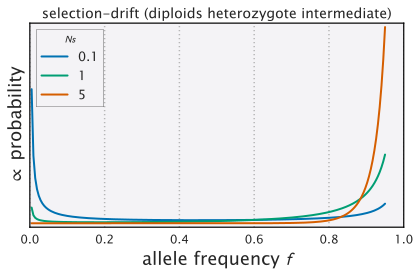

In [81]:
# Define parameters
N_s = [0.1, 1, 5]
freq = np.linspace(0, 0.95, 200)

fig, ax = plt.subplots(1, 1)
# Loop through mutation rates and plot the distribution
for ns in N_s:
    f, prob = sel_drift_dip_hetero_intermediate(freq, ns)
    plt.plot(f, prob / np.sum(prob),
             label=str(ns))
ax.legend(loc=0, title='$N s$')
ax.set_xlabel('allele frequency $f$')
ax.set_ylabel('$\propto$ probability')
ax.set_title('selection-drift (diploids heterozygote intermediate)', fontsize=14)
ax.axes.get_yaxis().set_ticks([])
ax.set_xlim([0, 1])
ax.margins(0.02)
plt.tight_layout()
plt.savefig('fig/sel_drift_diploid_hetero_intermediate.png')

### Mutation-Selection-Drift.
For the case of a diploid organism where the genotypes have fitness values
\begin{align}
\omega_{AA} = 1 - s,\\
\omega_{Aa} = 1,\\
\omega_{aa} = 1,
\end{align}
And the mutation rates are given by
\begin{align}
\mu_{A \rightarrow a} = 0\\
\mu_{a \rightarrow A} = \mu\\
\end{align}

we have that the steady state distribution of alleles is of the form
$$
P(f) \propto \frac{e^{-2Ns f^2} (1 - f)^{2N \mu}}{f(1 - f)}
\tag{3}
$$
Let's look at some distributions.

In [85]:
def mut_sel_drift(f, N, s, mu):
    prob = np.exp(- 2 * N * s * f**2) * (1 - f)**(2 * N * mu) / (f * (1 - f))
    idx = np.logical_and(prob >=0, prob!=np.inf) # to avoid indeterminations
    return f[idx], prob[idx]

In [98]:
# Define parameters
N = [10**2, 10**4]
s = 0.0001
mu = [10**-1, 10**-6]

/Users/razo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/Users/razo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/Users/razo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater_equal
  app.launch_new_instance()


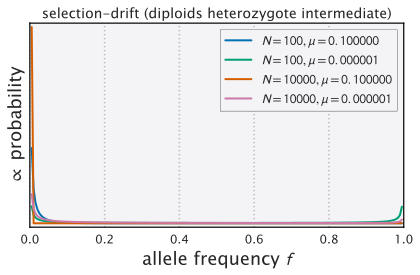

In [99]:
freq = np.linspace(0, 1, 200)

fig, ax = plt.subplots(1, 1)
# Loop through mutation rates and plot the distribution
for n in N:
    for m in mu:
        f, prob = mut_sel_drift(freq, n, s, m)
        plt.plot(f, prob / np.sum(prob),
                label='$N = {0:d}, \mu = {1:f}$'.format(n, m))
ax.legend(loc=0)
ax.set_xlabel('allele frequency $f$')
ax.set_ylabel('$\propto$ probability')
ax.set_title('selection-drift (diploids heterozygote intermediate)', fontsize=14)
ax.axes.get_yaxis().set_ticks([])
ax.set_xlim([0, 1])
ax.margins(0.02)
plt.tight_layout()
# plt.savefig('fig/sel_drift_diploid_hetero_intermediate.png')

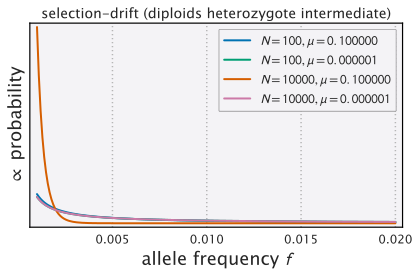

In [101]:
freq = np.linspace(1E-3, 0.02, 200)

fig, ax = plt.subplots(1, 1)
# Loop through mutation rates and plot the distribution
for n in N:
    for m in mu:
        f, prob = mut_sel_drift(freq, n, s, m)
        plt.plot(f, prob / np.sum(prob),
                label='$N = {0:d}, \mu = {1:f}$'.format(n, m))
ax.legend(loc=0)
ax.set_xlabel('allele frequency $f$')
ax.set_ylabel('$\propto$ probability')
ax.set_title('selection-drift (diploids heterozygote intermediate)', fontsize=14)
ax.axes.get_yaxis().set_ticks([])
# ax.set_xlim([0, 1])
ax.margins(0.02)
plt.tight_layout()
# plt.savefig('fig/sel_drift_diploid_hetero_intermediate.png')